This project will cover software development skills.  A review will be performed of a .csv file containing informtaion regarding the sale of used cars. Data will be cleaned by removing duplicates and clean out empty columns.  The data will be reviewed for trends between key elements. Tool will use pandas, numpy, Plotly Express, GitHub, and Render. 

Following is a data review a comparision between the manufacturers and the selling price.  Is there a price difference between types of engines? Does the age of the car effect the selling price? 

All code will then be committed and pushed to the GitHub repository where it will be accessible to other users.  The code will be utilized in Render to create interactive plots. 

In [97]:
#import libraries 
import pandas as pd 
import plotly.express as px
import streamlit as st
import matplotlib.pyplot as plt

#pip install altair["all"]

In [98]:
#import csv file 
vehicles=pd.read_csv('../vehicles_us.csv')

In [99]:
#ensure uploaded correctly 
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [100]:
#check for duplicates
print(vehicles.duplicated().sum())

0


In [101]:
#check for empty values 
print(vehicles.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


There are quite a few empty values which need to be filled back in.  Plan to run the entire file through a function.  The odometer blanks will be filled in wih the median odometer measuremnt based on manufacturer and model year.  The 'is_4wd' will be filled in based on if the vehicle_type is listed previously in teh file as being 4_wd.  The type will be convereted to boolean to represent the true/false it is being recorded as. 

In [102]:
vehicles=pd.read_csv('../vehicles_us.csv')
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [103]:
#model column contains both the manufacturer and model information so split them into seperate columns to be able to evaluate. 
vehicles[['manufacturer', 'model']]=vehicles['model'].str.split(" ", n=1, expand=True)
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler


In [104]:
def preprocess_data(file_path):
    vehicles = pd.read_csv(file_path)
    vehicles[['manufacturer', 'model']]=vehicles['model'].str.split(" ", n=1, expand=True)
    
    # Fill missing 'odometer' values
    vehicles['odometer'] = vehicles.groupby(['manufacturer', 'model_year'])['odometer'].transform(lambda x: x.fillna(x.median()))
    vehicles['odometer'] = vehicles['odometer'].fillna(vehicles['odometer'].median())
    
    # Convert 'is_4wd' to boolean
    likely_4wd_types = ['suv', 'pickup']
    vehicles['is_4wd'] = vehicles.apply(lambda row: 1.0 if pd.isna(row['is_4wd']) and row['type'] in likely_4wd_types else row['is_4wd'], axis=1)
    vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0.0)
    vehicles['is_4wd'] = vehicles['is_4wd'].astype(bool)

    #fill in missing 'model_year' values 
    vehicles['model_year'] = vehicles.groupby(['manufacturer', 'model_year'])['model_year'].transform(lambda x: x.fillna(x.median()))
    vehicles['model_year'] = vehicles['model_year'].fillna(vehicles['model_year'].median())
    
    
    return vehicles

# Use the function to preprocess data
vehicles = preprocess_data('../vehicles_us.csv')
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,bmw
1,25500,2011.0,f-150,good,6.0,gas,114250.0,automatic,pickup,white,True,2018-10-19,50,ford
2,5500,2013.0,sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,hyundai
3,1500,2003.0,f-150,fair,8.0,gas,165000.0,automatic,pickup,NaN,True,2019-03-22,9,ford
4,14900,2017.0,200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,chrysler


In [105]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  manufacturer  51525 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 5.2+ MB


In [106]:
#fill in empty values with 0 so be able to adjust datatypes.  with empty values unable to turn into integers
vehicles[['cylinders']]=vehicles['cylinders'].fillna(0)


ValueError: Columns must be same length as key

Convert data types to remove emtpy values. 

In [35]:
#edit column datatypes
vehicles['model_year']=vehicles['model_year'].astype(int)
vehicles['cylinders']=vehicles['cylinders'].astype(int)
vehicles['is_4wd']=vehicles['is_4wd'].astype(int)
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,0.0,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


Paint color is an object data type.  The information will be filled with "NA" since the colors are unknown. 

In [36]:
#fill in empty values for object data type
vehicles['paint_color']=vehicles['paint_color'].fillna('NA')

#check replacements successful 
print(vehicles.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


In [37]:
vehicles.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,1868.590121,5.499932,97854.326948,0.496303,39.55476
std,10040.803015,513.626950,2.431985,72940.007970,0.499991,28.20427
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,5000.000000,2005.000000,4.000000,35896.000000,0.000000,19.00000
50%,9000.000000,2010.000000,6.000000,99114.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


Finding the range of years of cars being sold will help with calculations.  Find the minimum and max of "model_year" in range. 

In [38]:
#find mininum of years produced
print(vehicles['model_year'][vehicles['model_year'] != 0].min())

1908


In [39]:
#find max of year produced 
vehicles['model_year'].max()

2019

A list of unique manufacturers would enable a way to filter the list. 

In [41]:
#find all unique manufacturers
manufacturer_choice=vehicles['manufacturer'].unique()
manufacturer_choice

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

  manufacturer      price
0        acura    1527982
1          bmw    2855803
2        buick    3100135
3     cadillac    5484323
4    chevrolet  152091995


<Axes: title={'center': 'Most Popular Manufacturers'}, xlabel='Manufacturer', ylabel='Selling Price ($)'>

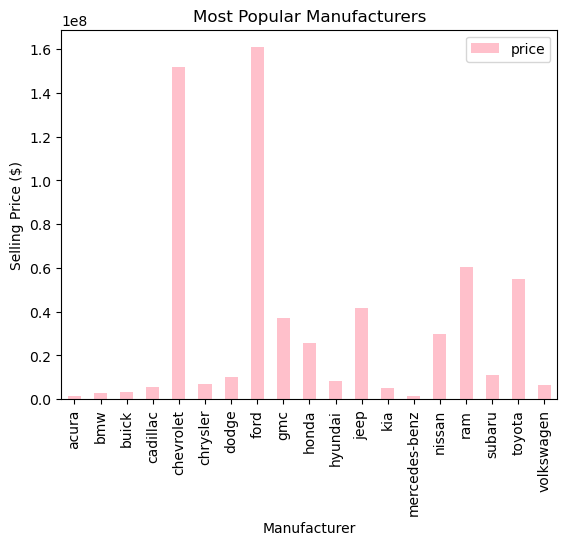

In [42]:
#price distribution by manufacturer 
manufacturer_type=vehicles.groupby('manufacturer')['price'].sum().reset_index()
print(manufacturer_type.head())
manufacturer_type.plot(x='manufacturer', y='price', kind= 'bar', title='Most Popular Manufacturers', color='pink', xlabel='Manufacturer', ylabel='Selling Price ($)')



In [43]:
#count the number of cars sold by each manufacturer type 
number_of_cars_per_manufacturer=vehicles['manufacturer'].value_counts().reset_index()
print(number_of_cars_per_manufacturer)


     manufacturer  count
0            ford  12672
1       chevrolet  10611
2          toyota   5445
3           honda   3485
4             ram   3316
5            jeep   3281
6          nissan   3208
7             gmc   2378
8          subaru   1272
9           dodge   1255
10        hyundai   1173
11     volkswagen    869
12       chrysler    838
13            kia    585
14       cadillac    322
15          buick    271
16            bmw    267
17          acura    236
18  mercedes-benz     41


In [44]:
average_cost_per_car=pd.merge(number_of_cars_per_manufacturer,manufacturer_type, on='manufacturer')
print(average_cost_per_car.head())

  manufacturer  count      price
0         ford  12672  160904646
1    chevrolet  10611  152091995
2       toyota   5445   54982930
3        honda   3485   25501920
4          ram   3316   60296880


In [45]:
average_cost_per_car['average_price']=average_cost_per_car['price']/average_cost_per_car['count']
print(average_cost_per_car)

     manufacturer  count      price  average_price
0            ford  12672  160904646   12697.651989
1       chevrolet  10611  152091995   14333.427104
2          toyota   5445   54982930   10097.875115
3           honda   3485   25501920    7317.624103
4             ram   3316   60296880   18183.618818
5            jeep   3281   41912752   12774.383420
6          nissan   3208   29983477    9346.470387
7             gmc   2378   37102366   15602.340622
8          subaru   1272   11108018    8732.718553
9           dodge   1255   10124158    8067.058167
10        hyundai   1173    8512455    7256.994885
11     volkswagen    869    6306686    7257.406214
12       chrysler    838    6857135    8182.738663
13            kia    585    5040694    8616.570940
14       cadillac    322    5484323   17032.059006
15          buick    271    3100135   11439.612546
16            bmw    267    2855803   10695.891386
17          acura    236    1527982    6474.500000
18  mercedes-benz     41    143

It seems the most expensive car manufacturers are both Chevrolet and Ford.  However these are notoriously affordable brands.  This is an indication that the volume of cars sold that were Chevrolet and Ford were higher than other brands. This is confirmed by counting the occurance of each type of car. On average the most expensive car is the Mercedes-Benz with its average price of $34,900.  Ford average price is $12,697 and Chevrolet is $14,333.  However Ford sold 309X number of cars as Mercedes-Benz. 

C:\Users\jvpor\AppData\Local\Temp\ipykernel_32908\386271449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_year['age_of_car']=vehicles_year['year_posted']-vehicles_year['model_year']


NameError: name 'savefig' is not defined

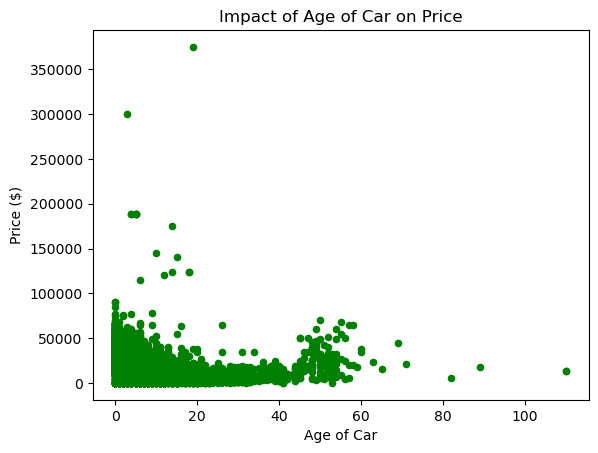

In [46]:
#Age of Car effect price 
vehicles['date_posted']=pd.to_datetime(vehicles['date_posted']) # convert to the datetime
vehicles['year_posted'] = vehicles['date_posted'].dt.year # extract year from datetime, and the result is an integer

#create dataframe where missing model_year is excluded 
vehicles_year=vehicles[vehicles['model_year'] !=0]
vehicles_year['model_year'].min()
vehicles_year['age_of_car']=vehicles_year['year_posted']-vehicles_year['model_year']
vehicles_year.head()


vehicles_year.plot(x='age_of_car', y='price', kind='scatter', title='Impact of Age of Car on Price', color='green', xlabel='Age of Car', ylabel='Price ($)')
savefig('Impact of Age of Car on Price ')
vehicles_year.plot(x='age_of_car', y='price', kind='scatter', title='Impact of Age of Car on Price', color='green', xlabel='Age of Car', ylabel='Price ($)')



The age of a car for cale influences the selling price.  An interesting note that the oldest car listed is on the cheaper side.  This most likely because of the lack of ability to frequently drive or the fact that the car would need repair.  Another interesting note is that a car 20 years old is listed as most expensive.  In general the cars under 10 years old are the most expensive.  Since cars value decreases with the number of miles driven (usually linked to age of the car) it would make sense that the most valueable cars are the newest. 


,fuel,days_listed
0,diesel,33.0
1,electric,37.5
2,gas,33.0
3,hybrid,32.0
4,other,29.0


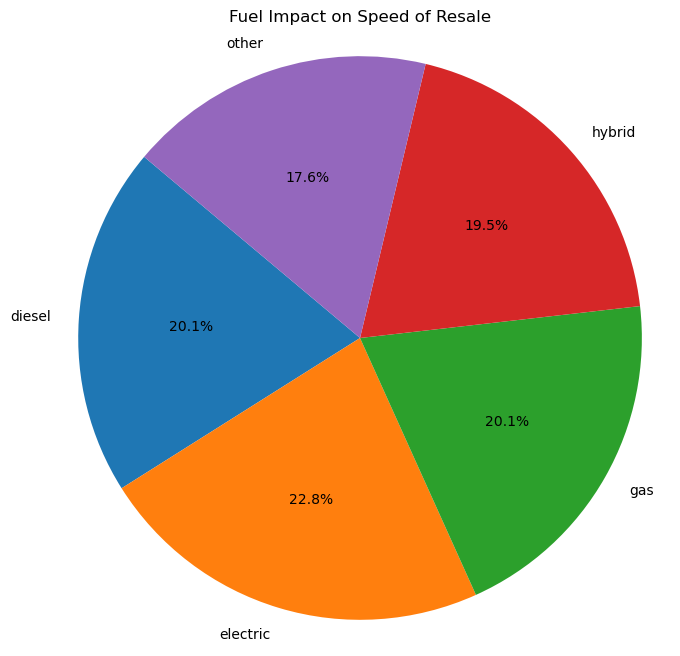

In [107]:
#visualrepresentation of if a diesel or gas car sells faster 
gas_type=vehicles.groupby('fuel').agg({'days_listed':'median'}).reset_index()
display(gas_type.head())

#regulare pie chart
# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(gas_type['days_listed'], labels=gas_type['fuel'], autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Fuel Impact on Speed of Resale')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


Consumers often based their car purchase decision on the type of fuel needed to power the car.  This decision process could be shaped by morals or tax refunds offered. In resale of cars the above chart shows the effect on type of engine on how fast the sale is compelted.  Electric car are the slowest type of car engines for resale.  Gas, Hybrid, and Diesel car types length of days for resale is pretty unified (~32/33 days).  The cars sold the fastest have the fuel type of "Other".     

In [108]:
#what is the most common color for an Acura 
visual=vehicles_year.groupby(['manufacturer','paint_color'])['paint_color'].count()
visual.head()




manufacturer  paint_color
acura         NA             47
              black          38
              blue            9
              brown           2
              custom          2
Name: paint_color, dtype: int64

<Axes: title={'center': 'Acura Most Common Color'}, xlabel='Color', ylabel='Number of Cars'>

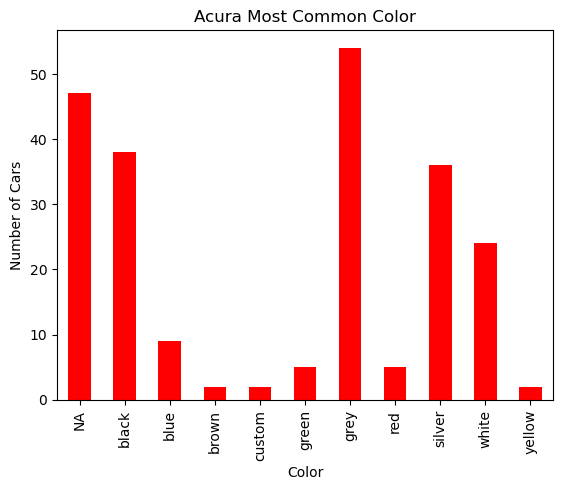

In [110]:
#create a plot 
#tried area plot but not accurate representation 
#print(visual['acura'].plot.area())
visual['acura'].plot(x='paint_color', kind= 'bar', title='Acura Most Common Color', color='red', xlabel='Color', ylabel='Number of Cars')



Acuras are listed as a luxury type of vehicle.  Interesting to see that the most common color Acura is grey.  Confirmed information avaialable (ommitting cars sold with an unkown color) shows the next frequent colors are black, silver, and white.  These colors are more neutral color palette than other options (red, yellow, green). Color of car can effec the insurance price.  Now when seeing a resale Acura that is grey colored that they are basic lemmings. 